En esta primera práctica has de implementar un algoritmo de integración numérica basado
en el método de Monte Carlo.
Dada una función real e integrable de una sola variable f(x), y su integral F(x), la integral
definida de f(x) entre a y b viene dada por la expresión ...
Como el cálculo simbólico de la integral F(x) puede ser muy difícil, se utilizan métodos numéricos
que aproximan su valor utilizando la interpretación geométrica de la integral definida que se
corresponde con el área bajo la curva f(x) entre a y b.
Dada una función f(x) positiva en el intervalo x 2 [a; b] cuyo valor máximo es M dentro de
ese intervalo, podemos definir un rectángulo de área (b  a) ⇥ M como el que se muestra en la
figura para el intervalo [0; 2]. El método de Monte Carlo para el cálculo de la integral consiste
en generar aleatoriamente puntos (en rojo en la figura) dentro de ese rectángulo y aproximar el
valor de la integral por el porcentaje de puntos que caen por debajo de la función en cuestión:...
Donde Ndebajo es el número de puntos (x, y) generados aleatoriamente cuya coordenada y es
menor que el valor de la función f(x) para ese valor de x y Ntotal es el número total de puntos
generados aleatoriamente dentro del rectángulo.

Implementa en Python una función con la siguiente cabecera
    -> def integra_mc(fun, a, b, num_puntos=10000)
que calcule la integral de fun entre a y b por el método de Monte Carlo antes descrito, generando
para ello num_puntos aleatoriamente. Puedes comprobar la corrección del resultado obtenido,
comparándolo con el de aplicar la función scipy.integrate.quad de Python.
Debes implementar dos versiones del algoritmo, una iterativa que realice num_puntos iteraciones para calcular el resultado, y otra que utilice operaciones entre vectores en lugar de bucles,
comparando los tiempos de ejecución obtenidos con ambas versiones.

In [5]:
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad

def integra_mc(fun, a, b, num_puntos=10000):

    #  1- Calcular el valor maximo de la función en el intervalo [a, b]
    y_max = max(eval(fun, {"x": x}) for x in [i / 100 for i in range(int(a * 100), int(b * 100) + 1)])

    #Este es el primer paso para saber el rango en el que puedo definir los puntos aleatorios y necesario 
    #para poder calcular el area del rectangulo (b-a) * y_max
    
    # 2- Generar puntos aleatorios
    x = [random.uniform(a, b) for _ in range(num_puntos)]
    y = [random.uniform(0, y_max) for _ in range(num_puntos)]

    # 3- Contar puntos debajo de la función
    puntos_debajo = sum(1 for x_i, y_i in zip(x, y) if y_i <= eval(fun, {"x": x_i}))

    # 4-Calcular la integral aproximada
    area_rectangulo = (b - a) * y_max
    integral_aproximada = (puntos_debajo / num_puntos) * area_rectangulo

    
    # Mostrar resultados
    print(f"Integral Monte Carlo: {integral_aproximada:.4f}")

    # Grafica
    figura, eje = plt.subplots()
    eje.set_xlabel("X")
    eje.set_ylabel("Y")
    eje.set_xlim(a, b)
    eje.set_ylim(0, y_max * 1.1)

    # Dibujar los puntos
    eje.scatter(x, y, marker='x', color='red', alpha=0.5)

    # Dibujar la función
    x_vals = [i / 100 for i in range(int(a * 100), int(b * 100) + 1)]
    y_vals = [eval(fun, {"x": x}) for x in x_vals]
    eje.plot(x_vals, y_vals, color='blue', label=f"y = {fun}")

    # Mostrar la gráfica
    plt.show()

    #Integral exacta usando scipy.integrate.quad
    def f(x):
        return eval(fun, {"x": x})
        
    integral_exacta, _ = quad(f, a, b)
    
    print(f"Integral exacta: {integral_exacta:.4f}")
    print(f"Integral Monte Carlo: {integral_aproximada:.4f}")


Integral Monte Carlo: 346.4300


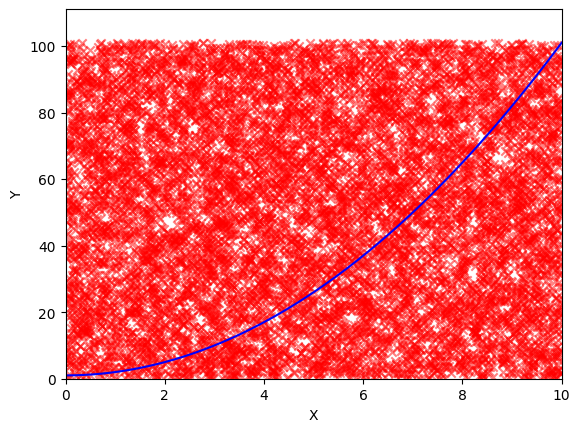

Integral exacta: 343.3333
Integral Monte Carlo: 346.4300


In [7]:
# Llamar a la función integra_mc
expr = "x**2 + 1"  # funcion a integrar
a, b = 0, 10  # limites del intervalo
num_puntos = 10000  # puntos aleatorios

integra_mc(expr, a, b, num_puntos)


